# Solution of the Einstein's Equations for Black Holes in spherical coordinates, by Lucas Romero Fernández
## Introduction and motivation

In General Relativity (GR), the solutions to the Einstein's equations (EEs), except in exceptional situations, must be primarily obtained through numerical methods, which can prove to be a difficult and labor-intensive task. However, there are cases that are relatively simple but provide relevant theoretical insight and prove to be important for the broader scheme of applications in the field of physics. One such case is the *spherically symmetric* spacetime, which is significant because, from a practical standpoint, even though it represents a 4D spacetime, it depends only on the radial coordinate and the time coordinate and thus, the numerical process only requires 2D operations (mostly independent from each other), a standard in Numerical Relativity (NR). From a theoretical perspective, many important astrophysical models, such as stars and black holes (the focus of this notebook in particular), approximate to this symmetry to an acceptable degree, allowing the study and understanding of fundamental physical problems such as star stability, gravitational collapse, and horizon dynamics, to name a few. Nevertheless, the main inconvenience of this model is the absence of gravitational waves (GWs), an essential aspect of GR.

## Formularization

The process of describing the system can begin with the simplified form of the spatial metric in spherical symmetry: 
$$ds^{2} = -\alpha^{2}dt + A(r, t)d\vec{r}^{2} + \vec{r}^{2}B(r, t) dΩ^{2} = -d\tau^{2} + dl^{2}, $$
where $A$, $B$ are positive metric functions, $\alpha$ is the lapse function, and $dΩ^{2} = dθ^{2} + sin^{2}(θ)dϕ^{2}$ is the solid angle element. To work with the EEs until first- order form, these variables can help:
$$D_{A} = ∂_{r} \mathrm{ln}A = \frac{∂_{r}A}{A} ; D_{B} = ∂_{r} \mathrm{ln}B = \frac{∂_{r}B}{B}; D_{\alpha} = ∂_{r} \mathrm{ln}\alpha = \frac{∂_{r}\alpha}{\alpha},$$
and the EEs can be further streamlined by using the components of the extrinsic curvature: 
$$K_{A} = K^{r}_{r} ; K_{B} = K^{θ}_{θ} = K^{ϕ}_{ϕ}.$$
Now, an important numerical problem that arises from the use of spherical coordinates is the singularity at the origin due to the lack of regularity of the geometric variables (the ones introduced before), specifically, because of the presence of terms in the evolution equations that behave as $\frac{1}{r}$ near $r = 0$, failing to converge at the origin and becoming unstable after a small number of time steps. The way to solve this is by introducing two different types of *regularity conditions* that the prior variables must verify in $r = 0$.

A well-defined value and behavior at the origin of the geometric variables is the first condition, achieved by demanding (considering local flatness at $r = 0$):
$$A ∼ A^{0} + O(r^{2}); B∼B^{0} + O(r^{2}); \alpha ∼ \alpha^{0} + O(r^{2});$$
$$D_{A} ∼ O(r); D_{B} ∼ O(r); D_{\alpha} ∼ O(r);$$
$$K_{A} ∼ K^{0}_{A} + O(r^{2}); K_{B} ∼ K^{0}_{B} + O(r^{2});$$
$$A - B ∼ O(r^{2}); K_{A} - K_{B} ∼ O(r^{2}),$$
where $A^{0} = B^{0}$, $\alpha^{0}$ and $K^{0}_{A} = K^{0}_{B}$ are functions that depend on the time coordinate. To implement this numerically, a finite differencing grid can be used to stagger the origin and obtain a boundary condition on a "ghost" point (the first point of the spatial grid) at $r = −\frac{dr}{2}$ ($dr$ is the space discretization) by imposing $A$, $B$, $\alpha$, $K_{A}$ and $K_{B}$ to be even functions at $r = 0$ (for example, $A[0] = A[1]$), and for $D_{A}$, $D_{B}$ and $D_{\alpha}$ to be odd at $r = 0$ (for example, $D_{A}[0] = -D_{A}[1]$).

The use of a second condition arises due to the system having issues such as ill-behaved terms and overdetermination of boundary conditions. For that reason, the second condition introduces another geometric variable:
$$\lambda = \frac{1}{r} \left (1 - \frac{A}{B} \right )∼ O(r); \lambda[0] = -\lambda[1], $$
this particular behavior is chosen because of the local flatness of space at $r = 0$.

After this process, the regularized and strongly hyperbolic ADM evolution equations in vacuum (no mass terms $\Rightarrow M_{A} = M_{B} = 0 \rightarrow \rho = j_{A} = 0$) and the Hamiltonian ($H$) and momentum ($m$) constraints in the first order for the case of spherical symmetry, vanishing shift and Bona-Masso slicing condition (with condition $1 + log \rightarrow f(α) = \frac{2}{α}$) can be introduced (see Miguel Alcubierre's, *"Introduction to 3+1 Numerical Relativity"*, you can find it here: https://es.scribd.com/document/431353858/Introduction-to-3-1-Numerical-Relativity-PDFDrive-com-pdf):
$$∂_{t}A = −2αAK_{A} ,$$
$$∂_{t}B = −2αBK_{B} ,$$
$$∂_{t}α = −2α(K_{A} + 2K_{B}) ,$$
$$∂_{t}D_{A} = −2α[K_{A}D_{α} + ∂_{r}K_{A}] ,$$
$$∂_{t}D_{B} = −2α[K_{B}D_{α} + ∂_{r}K_{B}] ,$$
$$∂_{t}D_{α} = −2∂_{r}[K_{A} + 2K_{B}] ,$$
$$∂_{t}K_{A} = −\frac{α}{A}\left [∂_{r}(D_{α} + D_{B}) + D^{2}_{α} − \frac{D_{α}D_{A}}{2} + \frac{D^{2}_{B}}{2} − \frac{D_{A}D_{B}}{2} − AK_{A}(K_{A} + 2K_{B}) − \frac{1}{r}(D_{A} − 2D_{B})\right ], $$
$$∂_{t}K_{B} = −\frac{α}{2A}\left [∂_{r}D_{B} + D_{α}D_{B} + D^{2}_{B} − \frac{D_{A}D_{B}}{2} − \frac{1}{r}(D_{A} - 2D_{α} − 4D_{B}) + \frac{2 \lambda}{r} \right ] + αK_{B}(K_{A} + 2K_{B}) ,$$
$$∂_{t}λ = \frac{2αA}{B}\left [∂_{r}K_{B} - \frac{D_{B}}{2}(K_{A} − K_{B})\right ] ,$$
$$H = −∂_{r}D_{B} − \frac{λ}{r} + AK_{B}(2K_{A} + K_{B}) + \frac{1}{r}(D_{A} − 3D_{B}) + \frac{D_{A}D_{B}}{2} − \frac{3D^{2}_{B}}{4} = 0 ,$$
$$m = −∂_{r}K_{B} + (K_{A} − K_{B})\left [\frac{1}{r} + \frac{D_{B}}{2} \right ] = 0 .$$

## Case of Evolving Schwarzschild BHs

In the case of this notebook, the *evolution of a single Schwarzschild black hole (BH)* will be considered, representing a fundamental example of the numerical simulations of a spherically symmetric spacetime. This may seem pointless, given that the Schwarzschild spacetime is static (suggesting there would be no evolution in a system like this), but that could not be further from the truth. The Schwarzschild spacetime is not static inside the BH horizon (an active solution with a reachable singularity in time), unlike the solution outside the horizon, and, even in changeless spacetimes, the study of the artificial evolution is still relevant. Generally, the Schwarzschild's case can be a respectable first step to later tackle more complex dynamic situations, such as gravitational collapse or the collision of compact objects, where BHs naturally arise in their processes.

To define the specific system of this case, initial conditions/data at $t = 0$ must be introduced, such as, for convenience, the use of isotropic coordinates that allow the spatial metric to take the form:
$$dl^{2} = ψ^{4}(dr^{2} + r^{2}dΩ^{2})$$
where $ψ = 1+\frac{M}{2r}$ is the conformal factor, $M = 1$ is the black hole's mass and $r$ is the “areal” Schwarzschild radius through $r_{Schwar} = rψ^{2} = r\left (1+\frac{M}{2r}\right )^{2}$. This metric already implies the initial value (expressed with the suffix $0$) of the geometric variables, which are $A_{0} = B_{0} = ψ^{4}$, $D_{A_{0}} = ∂_{r} \mathrm{ln} ψ^{4} = \frac{-4M}{r\left (2r+M\right )} = D_{B_{0}}$, $K_{A_{0}} = K_{B_{0}} = \lambda_{0} = 0$, $\alpha_{0} = 1$ and $D_{\alpha_{0}} = ∂_{r} \mathrm{ln} \alpha_{0} = 0$, resulting in $m_{0} = 0$ and $H_{0} = 0$, as predicted in the evolution equations. Regarding boundary conditions for $r = 0$, the previously mentioned conditions of even and odd functions will be applied, and for $r = r_{max} + \frac{dr}{2}$, the static type (equal to initial conditions) will be used.

With all the moving parts of the system explained, the code for the numerical simulation can be properly assembled. The code here solves the regularized strongly hyperbolic system of evolution equations and conditions of the previous section following closely Miguel Alcubierre's *"Introduction to 3+1 Numerical Relativity"*. It utilizes the Method of Lines (MOL), second-order differences (centered, backward and forward) in space with the optional correction of the Kreiss-Oliger dissipation filter and, to ensure better accuracy, even if third order is sufficient (see C. Bona's, C. Palenzuela-Luque's and C. Bona-Casas', *"Elements of Numerical Relativity and Relativistic Hydrodynamics"*), a fourth-order Runge-Kutta method is used as the time integrator, in a similar fashion as solving the 1D advection equation. All simulations have been performed using a grid with $N_{r} = 1000$ points in the spatial/radial direction, and an interval of $dr = 0.01$, and, following the CFL criteria for stability purposes (for example, in the general 1D advection equation, $\lambda = \frac{a dt}{dr} \le 1$), a time step $dt = 0.25 dr$ to reach a final time of $t_{f} = 10 M$. Furthermore, the code will be divided into multiple small sections for easier debugging and troubleshooting.

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
#Definition of general constants and arrays
M=1
dr=0.01
N_r=1000
r_0=-0.5*dr#Start of the radial domain
r_f=r_0 + N_r*dr#End of the radial domain
r_array=np.linspace(r_0,r_f,N_r,endpoint=False)#Spatial grid array
dt=0.25*dr
t_0=0#Start time
t_f=10*M#End time
N_t=int((t_f - t_0)/(dt))#Time discretitzation
dPlot=500#For the plots
sigma=0.5#Control parameter of the intensity of the Kreiss-Oliger dissipation filter term (Qd) (sigma >= 0 necessary!) (put equal to 0 to disable it)
A_plot_array=np.zeros(N_r)#For the normalization of A in the corresponding plot
alpha_array=np.ones(N_r)#Because of initial conditions
psi_array=np.zeros(N_r)
inv_r_array=np.zeros(N_r)#1/r array
D_A_array=np.zeros(N_r)
D_B_array=np.zeros(N_r)
D_alpha_array=np.zeros(N_r)#Because of initial conditions
K_A_array=np.zeros(N_r)#Because of initial conditions
K_B_array=np.zeros(N_r)#Because of initial conditions
lambda_array=np.zeros(N_r)#Because of initial conditions
states_matrix=np.zeros([N_r,9])#Matrix of the values of all equation variables (in order) at every spatial point
dudr_array=np.zeros(N_r)#Finite differences spatial derivative scheme array

In [2]:
#Definition of variables and functions
for j in range(N_r):#Non-zero initial conditions
    psi_array[j]=1 + ((M)/(2*r_array[j]))
    inv_r_array[j]=(1)/(r_array[j])
    D_A_array[j]=-(4*M)/(r_array[j]*(2*r_array[j] + M))
    D_B_array[j]=-(4*M)/(r_array[j]*(2*r_array[j] + M))
A_array=psi_array**4
B_array=psi_array**4
states_matrix[:,0]=A_array
states_matrix[:,1]=B_array
states_matrix[:,2]=alpha_array
states_matrix[:,3]=D_A_array
states_matrix[:,4]=D_B_array
states_matrix[:,5]=D_alpha_array
states_matrix[:,6]=K_A_array
states_matrix[:,7]=K_B_array
states_matrix[:,8]=lambda_array
def Finite_Difference_Derivative_Order2(u_array):
    dudr_array[0]=(u_array[1] - u_array[0])/(dr)#Forward
    dudr_array[1:-1]=(u_array[2:] - u_array[:-2])/(2*dr)#Centered
    dudr_array[-1]=(u_array[-1] - u_array[-2])/(dr)#Backward
    return dudr_array
def RHS(A_array,B_array,alpha_array,D_A_array,D_B_array,D_alpha_array,K_A_array,K_B_array,lambda_array):#Right Hand Side of the equations
    if sigma==0:
        Qd_A=0
        Qd_B=0
        Qd_alpha=0
        Qd_D_A=0
        Qd_D_B=0
        Qd_D_alpha=0
        Qd_K_A=0
        Qd_K_B=0
        Qd_lambda=0
    else:
        for j in range(3,N_r-3):#Kreiss-Oliger dissipation filter terms (Qd) for each equation (not necessary if only a quick approximated solution is needed)
            Qd_A=(1/(64*dr))*(A_array[j+3]-6*A_array[j+2]+15*A_array[j+1]-20*A_array[j]+15*A_array[j-1]-6*A_array[j-2]+A_array[j-3])
            Qd_B=(1/(64*dr))*(B_array[j+3]-6*B_array[j+2]+15*B_array[j+1]-20*B_array[j]+15*B_array[j-1]-6*B_array[j-2]+B_array[j-3])
            Qd_alpha=(1/(64*dr))*(alpha_array[j+3]-6*alpha_array[j+2]+15*alpha_array[j+1]-20*alpha_array[j]+15*alpha_array[j-1]-6*alpha_array[j-2]+alpha_array[j-3])
            Qd_D_A=(1/(64*dr))*(D_A_array[j+3]-6*D_A_array[j+2]+15*D_A_array[j+1]-20*D_A_array[j]+15*D_A_array[j-1]-6*D_A_array[j-2]+D_A_array[j-3])
            Qd_D_B=(1/(64*dr))*(D_B_array[j+3]-6*D_B_array[j+2]+15*D_B_array[j+1]-20*D_B_array[j]+15*D_B_array[j-1]-6*D_B_array[j-2]+D_B_array[j-3])
            Qd_D_alpha=(1/(64*dr))*(D_alpha_array[j+3]-6*D_alpha_array[j+2]+15*D_alpha_array[j+1]-20*D_alpha_array[j]+15*D_alpha_array[j-1]-6*D_alpha_array[j-2]+D_alpha_array[j-3])
            Qd_K_A=(1/(64*dr))*(K_A_array[j+3]-6*K_A_array[j+2]+15*K_A_array[j+1]-20*K_A_array[j]+15*K_A_array[j-1]-6*K_A_array[j-2]+K_A_array[j-3])
            Qd_K_B=(1/(64*dr))*(K_B_array[j+3]-6*K_B_array[j+2]+15*K_B_array[j+1]-20*K_B_array[j]+15*K_B_array[j-1]-6*K_B_array[j-2]+K_B_array[j-3])
            Qd_lambda=(1/(64*dr))*(lambda_array[j+3]-6*lambda_array[j+2]+15*lambda_array[j+1]-20*lambda_array[j]+15*lambda_array[j-1]-6*lambda_array[j-2]+lambda_array[j-3])
    RHS_matrix=np.zeros([N_r,9])
    RHS_matrix[:,0]=-2*alpha_array*A_array*K_A_array+sigma*Qd_A
    RHS_matrix[:,1]=-2*alpha_array*B_array*K_B_array+sigma*Qd_B
    RHS_matrix[:,2]=-2*alpha_array*(K_A_array + 2*K_B_array)+sigma*Qd_alpha
    RHS_matrix[:,3]=-2*alpha_array*(K_A_array*D_alpha_array + Finite_Difference_Derivative_Order2(K_A_array))+sigma*Qd_D_A
    RHS_matrix[:,4]=-2*alpha_array*(K_B_array*D_alpha_array + Finite_Difference_Derivative_Order2(K_B_array))+sigma*Qd_D_B
    RHS_matrix[:,5]=-2*Finite_Difference_Derivative_Order2(K_A_array + 2*K_B_array)+sigma*Qd_D_alpha
    RHS_matrix[:,6]=-((alpha_array)/(A_array))*(Finite_Difference_Derivative_Order2(D_alpha_array + D_B_array) + D_alpha_array**2 - 0.5*(D_alpha_array*D_A_array - D_B_array**2 + D_A_array*D_B_array) - A_array*K_A_array*(K_A_array + 2*K_B_array) - inv_r_array*(D_A_array - 2*D_B_array))+sigma*Qd_K_A
    RHS_matrix[:,7]=-0.5*((alpha_array)/(A_array))*(Finite_Difference_Derivative_Order2(D_B_array) + D_alpha_array*D_B_array + D_B_array**2 - 0.5*D_A_array*D_B_array - inv_r_array*(D_A_array - 2*D_alpha_array - 4*D_B_array) + 2*inv_r_array*lambda_array) + alpha_array*K_B_array*(K_A_array + 2*K_B_array)+sigma*Qd_K_B
    RHS_matrix[:,8]=2*alpha_array*((A_array)/(B_array))*(Finite_Difference_Derivative_Order2(K_B_array) - 0.5*D_B_array*(K_A_array - K_B_array))+sigma*Qd_alpha
    return RHS_matrix
def RK4(states_matrix):#Imposing BCs after each variable every sub-step of the RK
    A_array=states_matrix[:,0]
    B_array=states_matrix[:,1]
    alpha_array=states_matrix[:,2]
    D_A_array=states_matrix[:,3]
    D_B_array=states_matrix[:,4]
    D_alpha_array=states_matrix[:,5]
    K_A_array=states_matrix[:,6]
    K_B_array=states_matrix[:,7]
    lambda_array=states_matrix[:,8]
    #First step
    k_1=dt*RHS(A_array,B_array,alpha_array,D_A_array,D_B_array,D_alpha_array,K_A_array,K_B_array,lambda_array)
    A_array=BC_A(A_array)
    B_array=BC_B(B_array)
    alpha_array=BC_alpha(alpha_array)
    D_A_array=BC_D_A(D_A_array)
    D_B_array=BC_D_B(D_B_array)
    D_alpha_array=BC_D_alpha(D_alpha_array)
    K_A_array=BC_K_A(K_A_array)
    K_B_array=BC_K_B(K_B_array)
    lambda_array=BC_lambda(lambda_array)
    A_array[0]=B_array[0]
    K_A_array[0]=K_B_array[0]
    A_i_array=A_array + 0.5*k_1[:,0]
    B_i_array=B_array + 0.5*k_1[:,1]
    alpha_i_array=alpha_array + 0.5*k_1[:,2]
    D_A_i_array=D_A_array + 0.5*k_1[:,3]
    D_B_i_array=D_B_array + 0.5*k_1[:,4]
    D_alpha_i_array=D_alpha_array + 0.5*k_1[:,5]
    K_A_i_array=K_A_array + 0.5*k_1[:,6]
    K_B_i_array=K_B_array + 0.5*k_1[:,7]
    lambda_i_array=lambda_array + 0.5*k_1[:,8]
    A_i_array=BC_A(A_i_array)
    B_i_array=BC_B(B_i_array)
    alpha_i_array=BC_alpha(alpha_i_array)
    D_A_i_array=BC_D_A(D_A_i_array)
    D_B_i_array=BC_D_B(D_B_i_array)
    D_alpha_i_array=BC_D_alpha(D_alpha_i_array)
    K_A_i_array=BC_K_A(K_A_i_array)
    K_B_i_array=BC_K_B(K_B_i_array)
    lambda_array=BC_lambda(lambda_array)
    A_array[0]=B_array[0]
    K_A_array[0]=K_B_array[0]
    #Second step
    k_2=dt*RHS(A_i_array,B_i_array,alpha_i_array,D_A_i_array,D_B_i_array,D_alpha_i_array,K_A_i_array,K_B_i_array,lambda_i_array)
    A_i_array=A_array + 0.5*k_2[:,0]
    B_i_array=B_array + 0.5*k_2[:,1]
    alpha_i_array=alpha_array + 0.5*k_2[:,2]
    D_A_i_array=D_A_array + 0.5*k_2[:,3]
    D_B_i_array=D_B_array + 0.5*k_2[:,4]
    D_alpha_i_array=D_alpha_array + 0.5*k_2[:,5]
    K_A_i_array=K_A_array + 0.5*k_2[:,6]
    K_B_i_array=K_B_array + 0.5*k_2[:,7]
    lambda_i_array=lambda_array + 0.5*k_2[:,8]
    A_i_array=BC_A(A_i_array)
    B_i_array=BC_B(B_i_array)
    alpha_i_array=BC_alpha(alpha_i_array)
    D_A_i_array=BC_D_A(D_A_i_array)
    D_B_i_array=BC_D_B(D_B_i_array)
    D_alpha_i_array=BC_D_alpha(D_alpha_i_array)
    K_A_i_array=BC_K_A(K_A_i_array)
    K_B_i_array=BC_K_B(K_B_i_array)
    lambda_array=BC_lambda(lambda_array)
    A_array[0]=B_array[0]
    K_A_array[0]=K_B_array[0]
    #Third step
    k_3=dt*RHS(A_i_array,B_i_array,alpha_i_array,D_A_i_array,D_B_i_array,D_alpha_i_array,K_A_i_array,K_B_i_array,lambda_i_array)
    A_i_array=A_array + k_3[:,0]
    B_i_array=B_array + k_3[:,1]
    alpha_i_array=alpha_array + k_3[:,2]
    D_A_i_array=D_A_array + k_3[:,3]
    D_B_i_array=D_B_array + k_3[:,4]
    D_alpha_i_array=D_alpha_array + k_3[:,5]
    K_A_i_array=K_A_array + k_3[:,6]
    K_B_i_array=K_B_array + k_3[:,7]
    lambda_i_array=lambda_array + k_3[:,8]
    A_i_array=BC_A(A_i_array)
    B_i_array=BC_B(B_i_array)
    alpha_i_array=BC_alpha(alpha_i_array)
    D_A_i_array=BC_D_A(D_A_i_array)
    D_B_i_array=BC_D_B(D_B_i_array)
    D_alpha_i_array=BC_D_alpha(D_alpha_i_array)
    K_A_i_array=BC_K_A(K_A_i_array)
    K_B_i_array=BC_K_B(K_B_i_array)
    lambda_array=BC_lambda(lambda_array)
    A_array[0]=B_array[0]
    K_A_array[0]=K_B_array[0]
    #Last step
    k_4=dt*RHS(A_i_array,B_i_array,alpha_i_array,D_A_i_array,D_B_i_array,D_alpha_i_array,K_A_i_array,K_B_i_array,lambda_i_array)
    dudt_matrix=states_matrix + ((1)/(6))*(k_1 + 2*k_2 + 2*k_3 + k_4)
    return dudt_matrix
#Boundary conditions (static)
def EFunc(u_array):#For the even functions
    u_array[1]=u_array[0]
    return u_array
def OFunc(u_array):#For the odd functions
    u_array[1]=-u_array[0]
    return u_array
def BC_A(A_array):
    A_array=EFunc(A_array)
    A_array[-1]=(1 + ((M)/(2*r_array[-1])))**4#Static BC
    return A_array
def BC_B(B_array):
    B_array=EFunc(B_array)
    B_array[-1]=(1 + ((M)/(2*r_array[-1])))**4#Static BC
    return B_array
def BC_alpha(alpha_array):
    alpha_array=EFunc(alpha_array)
    alpha_array[-1]=1#Static BC
    return alpha_array
def BC_D_A(D_A_array):
    D_A_array=OFunc(D_A_array)
    D_A_array[-1]=-(4*M)/(r_array[-1]*(2*r_array[-1] + M))#Static BC
    return D_A_array
def BC_D_B(D_B_array):
    D_B_array=OFunc(D_B_array)
    D_B_array[-1]=-(4*M)/(r_array[-1]*(2*r_array[-1] + M))#Static BC
    return D_B_array
def BC_D_alpha(D_alpha_array):
    D_alpha_array=OFunc(D_alpha_array)
    D_alpha_array[-1]=0#Static BC
    return D_alpha_array
def BC_K_A(K_A_array):
    K_A_array=EFunc(K_A_array)
    K_A_array[-1]=0#Static BC
    return K_A_array
def BC_K_B(K_B_array):
    K_B_array=EFunc(K_B_array)
    K_B_array[-1]=0#Static BC
    return K_B_array
def BC_lambda(lambda_array):
    lambda_array=OFunc(lambda_array)
    lambda_array[-1]=0#Static BC
    return lambda_array

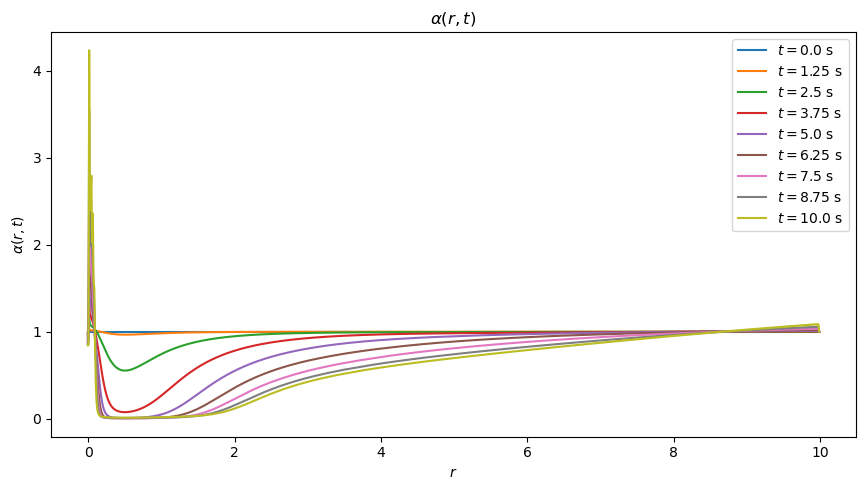

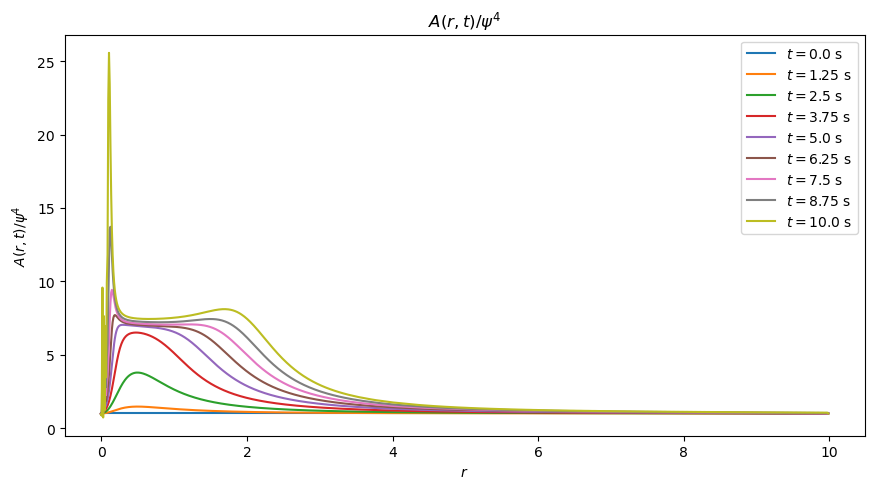

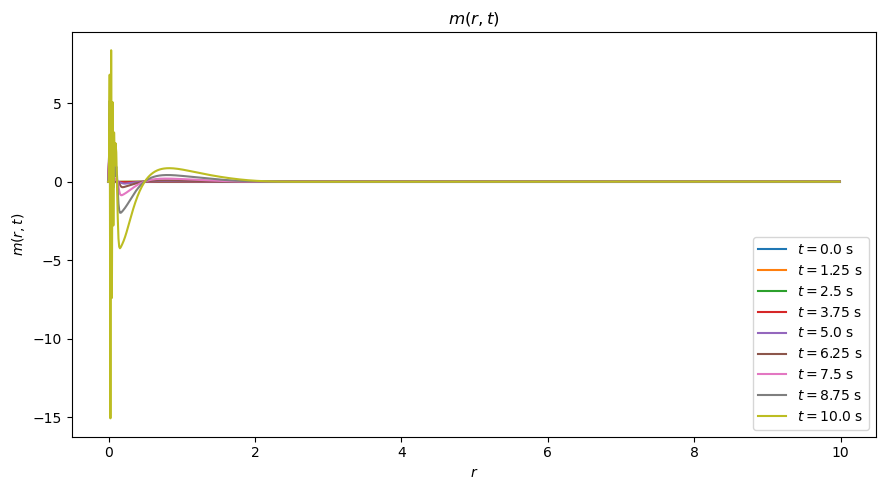

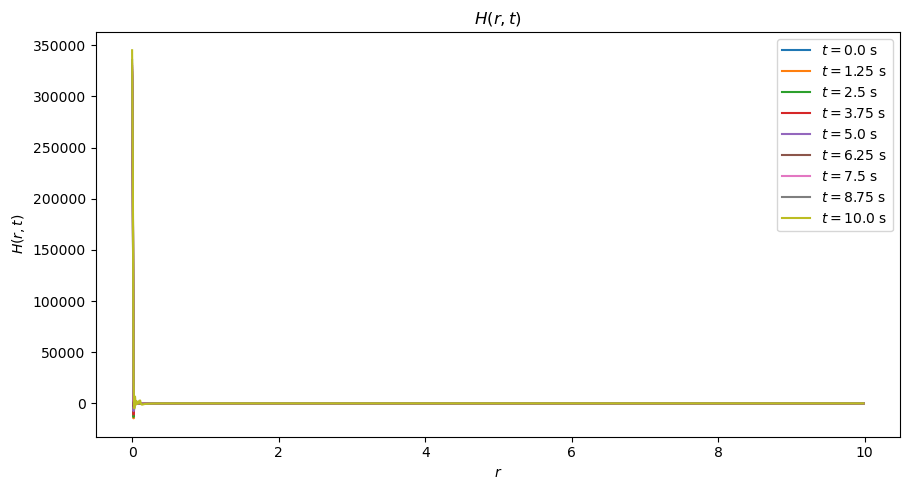

Program execution time: 178.671875 seconds.


In [3]:
#main_program
start_time_program=time.process_time()#To calculate the program execution time
#Solution evolution and plotting of the results
#Preparation of the graphs
#alpha(r,t)
plt.figure(1,figsize=(9,5))
plt.xlabel(r"$r$")
plt.ylabel(r"$\alpha(r,t)$")
plt.title(r"$\alpha(r,t)$")
plt.tight_layout()
#A(r,t)/psi^{4}
plt.figure(2,figsize=(9,5))
plt.xlabel(r"$r$")
plt.ylabel(r"$A(r, t)/\psi^{4}$")
plt.title(r"$A(r,t)/\psi^{4}$")
plt.tight_layout()
#m(r,t)
plt.figure(3,figsize=(9,5))
plt.xlabel(r"$r$")
plt.ylabel(r"$m(r,t)$")
plt.title(r"$m(r,t)$")
plt.tight_layout()
#H(r,t)
plt.figure(4,figsize=(9,5))
plt.xlabel(r"$r$")
plt.ylabel(r"$H(r,t)$")
plt.title(r"$H(r,t)$")
plt.tight_layout()
#Computation of the solution
for n in range(N_t+1):
    A_array=states_matrix[:,0]
    B_array=states_matrix[:,1]
    alpha_array=states_matrix[:,2]
    D_A_array=states_matrix[:,3]
    D_B_array=states_matrix[:,4]
    D_alpha_array=states_matrix[:,5]
    K_A_array=states_matrix[:,6]
    K_B_array=states_matrix[:,7]
    lambda_array=states_matrix[:,8]
    A_plot_array=((A_array)/(psi_array**4))
    m_array=-Finite_Difference_Derivative_Order2(K_B_array) + (K_A_array - K_B_array)*(inv_r_array + 0.5*D_B_array)#Momentum constraint
    H_array=-Finite_Difference_Derivative_Order2(D_B_array) - inv_r_array*lambda_array + A_array*K_B_array*(2*K_A_array + K_B_array) + inv_r_array*(D_A_array - 3*D_B_array) + 0.5*D_A_array*D_B_array - 0.75*D_B_array**2#Hamiltonian constraint
    if n % dPlot==0:
        #alpha(r,t)
        plt.figure(1)
        plt.plot(r_array,alpha_array,label=r"$t = $"+str(n*dt)+str(" s"))
        plt.legend()
        #A(r,t)/psi^{4}
        plt.figure(2)
        plt.plot(r_array,A_plot_array,label=r"$t = $"+str(n*dt)+str(" s"))
        plt.legend()
        #m(r,t)
        plt.figure(3)
        plt.plot(r_array,m_array,label=r"$t = $"+str(n*dt)+str(" s"))
        plt.legend()
        #H(r,t)
        plt.figure(4)
        plt.plot(r_array,H_array,label=r"$t = $"+str(n*dt)+str(" s"))
        plt.legend()
    #Time evolution
    states_matrix_new=RK4(states_matrix)
    A_new_array=states_matrix_new[:,0]
    B_new_array=states_matrix_new[:,1]
    alpha_new_array=states_matrix_new[:,2]
    D_A_new_array=states_matrix_new[:,3]
    D_B_new_array=states_matrix_new[:,4]
    D_alpha_new_array=states_matrix_new[:,5]
    K_A_new_array=states_matrix_new[:,6]
    K_B_new_array=states_matrix_new[:,7]
    lambda_new_array=states_matrix_new[:,8]
    #Imposing BCs
    A_new_array=BC_A(A_new_array)
    B_new_array=BC_B(B_new_array)
    alpha_new_array=BC_alpha(alpha_new_array)
    D_A_new_array=BC_D_A(D_A_new_array)
    D_B_new_array=BC_D_B(D_B_new_array)
    D_alpha_new_array=BC_D_alpha(D_alpha_new_array)
    K_A_new_array=BC_K_A(K_A_new_array)
    K_B_new_array=BC_K_B(K_B_new_array)
    lambda_new_array=BC_lambda(lambda_new_array)
    A_new_array[0]=B_new_array[0]
    K_A_new_array[0]=K_B_new_array[0]
    #Update for the next time step
    states_matrix[:,0]=A_new_array
    states_matrix[:,1]=B_new_array
    states_matrix[:,2]=alpha_new_array
    states_matrix[:,3]=D_A_new_array
    states_matrix[:,4]=D_B_new_array
    states_matrix[:,5]=D_alpha_new_array
    states_matrix[:,6]=K_A_new_array
    states_matrix[:,7]=K_B_new_array
    states_matrix[:,8]=lambda_new_array
plt.show()
print("Program execution time:",time.process_time()-start_time_program,"seconds.")

As can be seen in the graphs above, the results for $\alpha$, $\frac{A}{\psi^{4}}$, $m$ and $H$ approximately follow the behavior discussed Miguel Alcubierre's *"Introduction to 3+1 Numerical Relativity"* inside the BH's horizon ($r\leq1$) and far from it ($r>1$).